In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
from plotly.offline import plot

In [2]:
#in order to read datasets files mount Drive account into local disk 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#create tweets_df and delay_airlines_df

delay_airlines_path = "/content/drive/MyDrive/Data/Delay_Airlines.csv"
tweets_path='/content/drive/MyDrive/Data/Tweets.csv'

delay_airlines_df = pd.read_csv(delay_airlines_path)
tweets_df=pd.read_csv(tweets_path)


In [4]:
tweets_df.head()

,tweet_id,airline_sentiment,negativereason,airline,name,retweet_count,text,tweet_created,tweet_location
0,5.703061e+17,neutral,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN
1,5.703011e+17,positive,NaN,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN
2,5.703011e+17,neutral,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play
3,5.703010e+17,negative,Bad Flight,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN
4,5.703008e+17,negative,Can't Tell,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN


In [5]:
delay_airlines_df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 24
0,2015,2,1,7,2015-02-01,AA,AA,JFK,LAX,857.0,-3.0,0.0,1159.0,-36.0,0.0,0.0,0.0,323.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,2,2,1,2015-02-02,AA,AA,JFK,LAX,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,2,3,2,2015-02-03,AA,AA,JFK,LAX,856.0,-4.0,0.0,1227.0,-8.0,0.0,0.0,0.0,360.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,2,4,3,2015-02-04,AA,AA,JFK,LAX,855.0,-5.0,0.0,1224.0,-11.0,0.0,0.0,0.0,350.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,2,5,4,2015-02-05,AA,AA,JFK,LAX,853.0,-7.0,0.0,1225.0,-10.0,0.0,0.0,0.0,335.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#some analyze of data...

pd.set_option('display.max_rows', None)
#delay_airlines_df[delay_airlines_df["CANCELLED"] == 1].groupby(['DEP_TIME']).size().sort_values(ascending=False)
#delay_airlines_df[delay_airlines_df["CANCELLED"] == 1].isna().sum()
#len(tweets_df.index)
len(delay_airlines_df[delay_airlines_df["CANCELLED"] == 1].index)

#14.640 rows in tweets_df

#429.191 rows in delay_airlines_df
#20.517 rows with "CANCELLED" == 1
#20.059 rows with "CANCELLED" == 1 AND DEP_TIME NULL values 

20517

In [10]:
#create "tweets_retweets" measure as quantity of tweets + quantity of retweets per airline. Then it's plotted

grouped_tw = tweets_df.groupby('airline', as_index=False).agg(retweets_sum=('retweet_count', 'sum'),tweets_count=('tweet_id', 'count'))
grouped_tw['tweets_retweets'] = grouped_tw['retweets_sum']+grouped_tw['tweets_count']
grouped_tw_order = grouped_tw.sort_values('tweets_retweets', ascending=False)

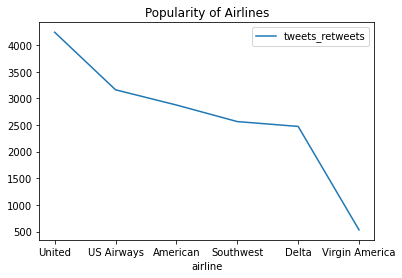

In [12]:
grouped_tw_order.plot(x='airline',y='tweets_retweets',title='Popularity of Airlines')

In [13]:
#create in tweets_df the columns "day_of_week" and "day_of_week_name" from "tweet_created". 
#"day_of_week" is to be used for ordering.

tweets_df['tweet_created'] = pd.to_datetime(tweets_df['tweet_created'])
tweets_df['day_of_week'] = tweets_df['tweet_created'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
tweets_df['day_of_week_name'] = tweets_df['day_of_week'].apply(lambda x: days[x])

In [14]:
#calculates quantity of tweets per day of the week and type of sentiment

grouped_day = tweets_df.groupby(['day_of_week','day_of_week_name','airline_sentiment']).size().reset_index(name='counts')
grouped_day.sort_values(by=['day_of_week', 'airline_sentiment'])

,day_of_week,day_of_week_name,airline_sentiment,counts
0,0,Mon,negative,1922
1,0,Mon,neutral,677
2,0,Mon,positive,433
3,1,Tues,negative,1619
4,1,Tues,neutral,634
5,1,Tues,positive,499
6,2,Weds,negative,736
7,2,Weds,neutral,335
8,2,Weds,positive,273
9,3,Thurs,negative,751


In [15]:
#calculates percentage of tweets per day of the week and type of sentiment

tweets_df.groupby(["day_of_week", "airline_sentiment"])\
.agg({"tweet_id" : "count"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["day_of_week", "airline_sentiment","tweet_id"], ascending=[True, True, False])

tweet_id
day_of_week airline_sentiment           
0           negative           63.390501
            neutral            22.328496
            positive           14.281003
1           negative           58.829942
            neutral            23.037791
            positive           18.132267
2           negative           54.761905
            neutral            24.925595
            positive           20.312500
3           negative           54.578488
            neutral            23.909884
            positive           21.511628
4           negative           55.666667
            neutral            25.533333
            positive           18.800000
5           negative           67.373154
            neutral            17.854849
            positive           14.771997
6           negative           73.595323
            neutral            15.037350
            positive           11.367327

In [16]:
#plot quantity of tweets per day of the week and type of sentiment

fig = px.histogram(tweets_df, x="airline_sentiment", 
                   color="airline_sentiment", 
                   facet_col="day_of_week_name",
                   title="Sentiment by Day of the Week",
                   category_orders={"airline_sentiment":["neutral","negative","positive"],"day_of_week_name":["Mon","Tues","Weds","Thurs","Fri","Sat","Sun"]}
                   )
fig.update_layout(yaxis_title="tweets_count")
fig.update_xaxes(visible=False, showticklabels=True)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

In [19]:
#plot quantity of tweets per airline and type of sentiment

fig = px.histogram(tweets_df, x="airline_sentiment", color="airline_sentiment", 
                   facet_col="airline",
                   title="Sentiment by Airline",
                   category_orders={"airline_sentiment":["neutral","negative","positive"],"airline":["United","US Airways","American","Southwest","Delta","Virgin America"]}
                   )
fig.update_layout(yaxis_title="tweets_count")
fig.update_xaxes(visible=False, showticklabels=True)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

In [20]:
#create in tweets_df the columns "hour_of_the_day" from "tweet_created"

tweets_df['tweet_created'] = pd.to_datetime(tweets_df['tweet_created'])
tweets_df['hour_of_the_day'] = tweets_df['tweet_created'].dt.hour

In [23]:
#calculates quantity of tweets per hour of the day and type of sentiment

grouped_hour = tweets_df.groupby(['hour_of_the_day','airline_sentiment']).size().reset_index(name='counts')
grouped_hour.sort_values(by=['hour_of_the_day', 'airline_sentiment'])

,hour_of_the_day,airline_sentiment,counts
0,0,negative,97
1,0,neutral,20
2,0,positive,14
3,1,negative,80
4,1,neutral,23
5,1,positive,8
6,2,negative,109
7,2,neutral,46
8,2,positive,19
9,3,negative,146


In [24]:
#calculates percentage of tweets per hour of the day and type of sentiment

tweets_df.groupby(["hour_of_the_day", "airline_sentiment"])\
.agg({"tweet_id" : "count"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["hour_of_the_day", "airline_sentiment","tweet_id"], ascending=[True, True, False])


tweet_id
hour_of_the_day airline_sentiment           
0               negative           74.045802
                neutral            15.267176
                positive           10.687023
1               negative           72.072072
                neutral            20.720721
                positive            7.207207
2               negative           62.643678
                neutral            26.436782
                positive           10.919540
3               negative           64.888889
                neutral            20.444444
                positive           14.666667
4               negative           64.130435
                neutral            20.108696
                positive           15.760870
5               negative           65.618449
                neutral            20.335430
                positive           14.046122
6               negative           63.607085
                neutral            19.967794
                positive           16.425121
7               negative           61.211340
                neutral            21.907216
                positive           16.881443
8               negative           60.043197
                neutral            22.894168
                positive           17.062635
9               negative           60.908193
                neutral            21.421520
                positive           17.670286
10              negative           56.444906
                neutral            24.844075
                positive           18.711019
11              negative           58.012170
                neutral            26.369168
                positive           15.618661
12              negative           58.859223
                neutral            23.907767
                positive           17.233010
13              negative           62.222222
                neutral            21.111111
                positive           16.666667
14              negative           63.106796
                neutral            21.574973
                positive           15.318231
15              negative           63.324873
                neutral            20.431472
                positive           16.243655
16              negative           63.079019
                neutral            20.708447
                positive           16.212534
17              negative           59.814324
                neutral            21.352785
                positive           18.832891
18              negative           63.515313
                neutral            19.041278
                positive           17.443409
19              negative           71.407407
                neutral            15.111111
                positive           13.481481
20              negative           64.617940
                neutral            18.936877
                positive           16.445183
21              negative           67.674419
                neutral            17.906977
                positive           14.418605
22              negative           73.630137
                neutral            14.726027
                positive           11.643836
23              negative           73.575130
                neutral            16.062176
                positive           10.362694

In [ ]:
#plot quantity of tweets per hour of the day and type of sentiment

fig = px.histogram(tweets_df, x="airline_sentiment", color="airline_sentiment", 
                   facet_col="hour_of_the_day",#facet_col_wrap=3,
                   title="Sentiment by Hour of the Day",
                   category_orders={"airline_sentiment":["neutral","negative","positive"]
                                    ,"hour_of_the_day":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]}
                   )
fig.update_layout(yaxis_title="tweets_count")
fig.update_xaxes(visible=False, showticklabels=True)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

In [26]:
#in order to merge tweets_df and delay_airlines_df
#create in delay_airlines_df the column "date_time" as addition of "YEAR"+"MONTH"+"DAY_OF_MONTH"+"DEP_TIME"

delay_airlines_df['DEP_TIME'] = delay_airlines_df['DEP_TIME'].fillna(0)
delay_airlines_df['date_time'] = delay_airlines_df['YEAR']*100000000 + delay_airlines_df['MONTH']*1000000+delay_airlines_df['DAY_OF_MONTH']*10000+delay_airlines_df['DEP_TIME'].astype(int)
delay_airlines_df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 24,date_time
0,2015,2,1,7,2015-02-01,AA,AA,JFK,LAX,857.0,-3.0,0.0,1159.0,-36.0,0.0,0.0,0.0,323.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,201502010857
1,2015,2,2,1,2015-02-02,AA,AA,JFK,LAX,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,201502020000
2,2015,2,3,2,2015-02-03,AA,AA,JFK,LAX,856.0,-4.0,0.0,1227.0,-8.0,0.0,0.0,0.0,360.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,201502030856
3,2015,2,4,3,2015-02-04,AA,AA,JFK,LAX,855.0,-5.0,0.0,1224.0,-11.0,0.0,0.0,0.0,350.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,201502040855
4,2015,2,5,4,2015-02-05,AA,AA,JFK,LAX,853.0,-7.0,0.0,1225.0,-10.0,0.0,0.0,0.0,335.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN,201502050853


In [30]:
#in order to merge tweets_df and delay_airlines_df
#create in tweets_df the column "date_time" as addition of year+month+day+hour+minute from "tweet_created"

tweets_df['tweet_created'] = pd.to_datetime(tweets_df['tweet_created'])
tweets_df['date_time'] = tweets_df['tweet_created'].dt.year*100000000+tweets_df['tweet_created'].dt.month*1000000+tweets_df['tweet_created'].dt.day*10000+tweets_df['tweet_created'].dt.hour*100+tweets_df['tweet_created'].dt.minute
tweets_df.head()

,tweet_id,airline_sentiment,negativereason,airline,name,retweet_count,text,tweet_created,tweet_location,day_of_week,day_of_week_name,hour_of_the_day,date_time
0,5.703061e+17,neutral,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,1,Tues,11,201502241135
1,5.703011e+17,positive,NaN,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,NaN,1,Tues,11,201502241115
2,5.703011e+17,neutral,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,1,Tues,11,201502241115
3,5.703010e+17,negative,Bad Flight,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,NaN,1,Tues,11,201502241115
4,5.703008e+17,negative,Can't Tell,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,NaN,1,Tues,11,201502241114


In [31]:
#create tweets_airlines_df as merge tweets_df and delay_airlines_df

tweets_airlines_df = df_inner = pd.merge(tweets_df, delay_airlines_df, on='date_time', how='inner')
tweets_airlines_df.head()
#len(tweets_airlines_df.index)

,tweet_id,airline_sentiment,negativereason,airline,name,retweet_count,text,tweet_created,tweet_location,day_of_week,day_of_week_name,hour_of_the_day,date_time,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 24
0,5.703061e+17,neutral,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,1,Tues,11,201502241135,2015,2,24,2,2015-02-24,AA,AA,ORD,BOS,1135.0,-5.0,0.0,1440.0,-11.0,0.0,0.0,0.0,105.0,867.0,NaN,NaN,NaN,NaN,NaN,NaN
1,5.703061e+17,neutral,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,1,Tues,11,201502241135,2015,2,24,2,2015-02-24,AS,AS,SEA,STL,1135.0,-10.0,0.0,1712.0,-13.0,0.0,0.0,0.0,197.0,1709.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5.703061e+17,neutral,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,1,Tues,11,201502241135,2015,2,24,2,2015-02-24,B6,B6,JFK,BTV,1135.0,0.0,0.0,1238.0,-9.0,0.0,0.0,0.0,42.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5.703061e+17,neutral,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,1,Tues,11,201502241135,2015,2,24,2,2015-02-24,AA,AA,DCA,DFW,1135.0,29.0,1.0,1410.0,30.0,1.0,0.0,0.0,190.0,1192.0,0.0,0.0,1.0,0.0,29.0,NaN
4,5.703061e+17,neutral,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,1,Tues,11,201502241135,2015,2,24,2,2015-02-24,B6,B6,LAS,LGB,1135.0,-10.0,0.0,1234.0,-18.0,0.0,0.0,0.0,43.0,231.0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#some analyze of data...

len(tweets_airlines_df[tweets_airlines_df["CANCELLED"] == 1].index)
#len(tweets_airlines_df.index) 

#tweets_airlines_df -> 195.381 rows 
#tweets_airlines_df -> 1.916 rows with CANCELLED = 1

1916

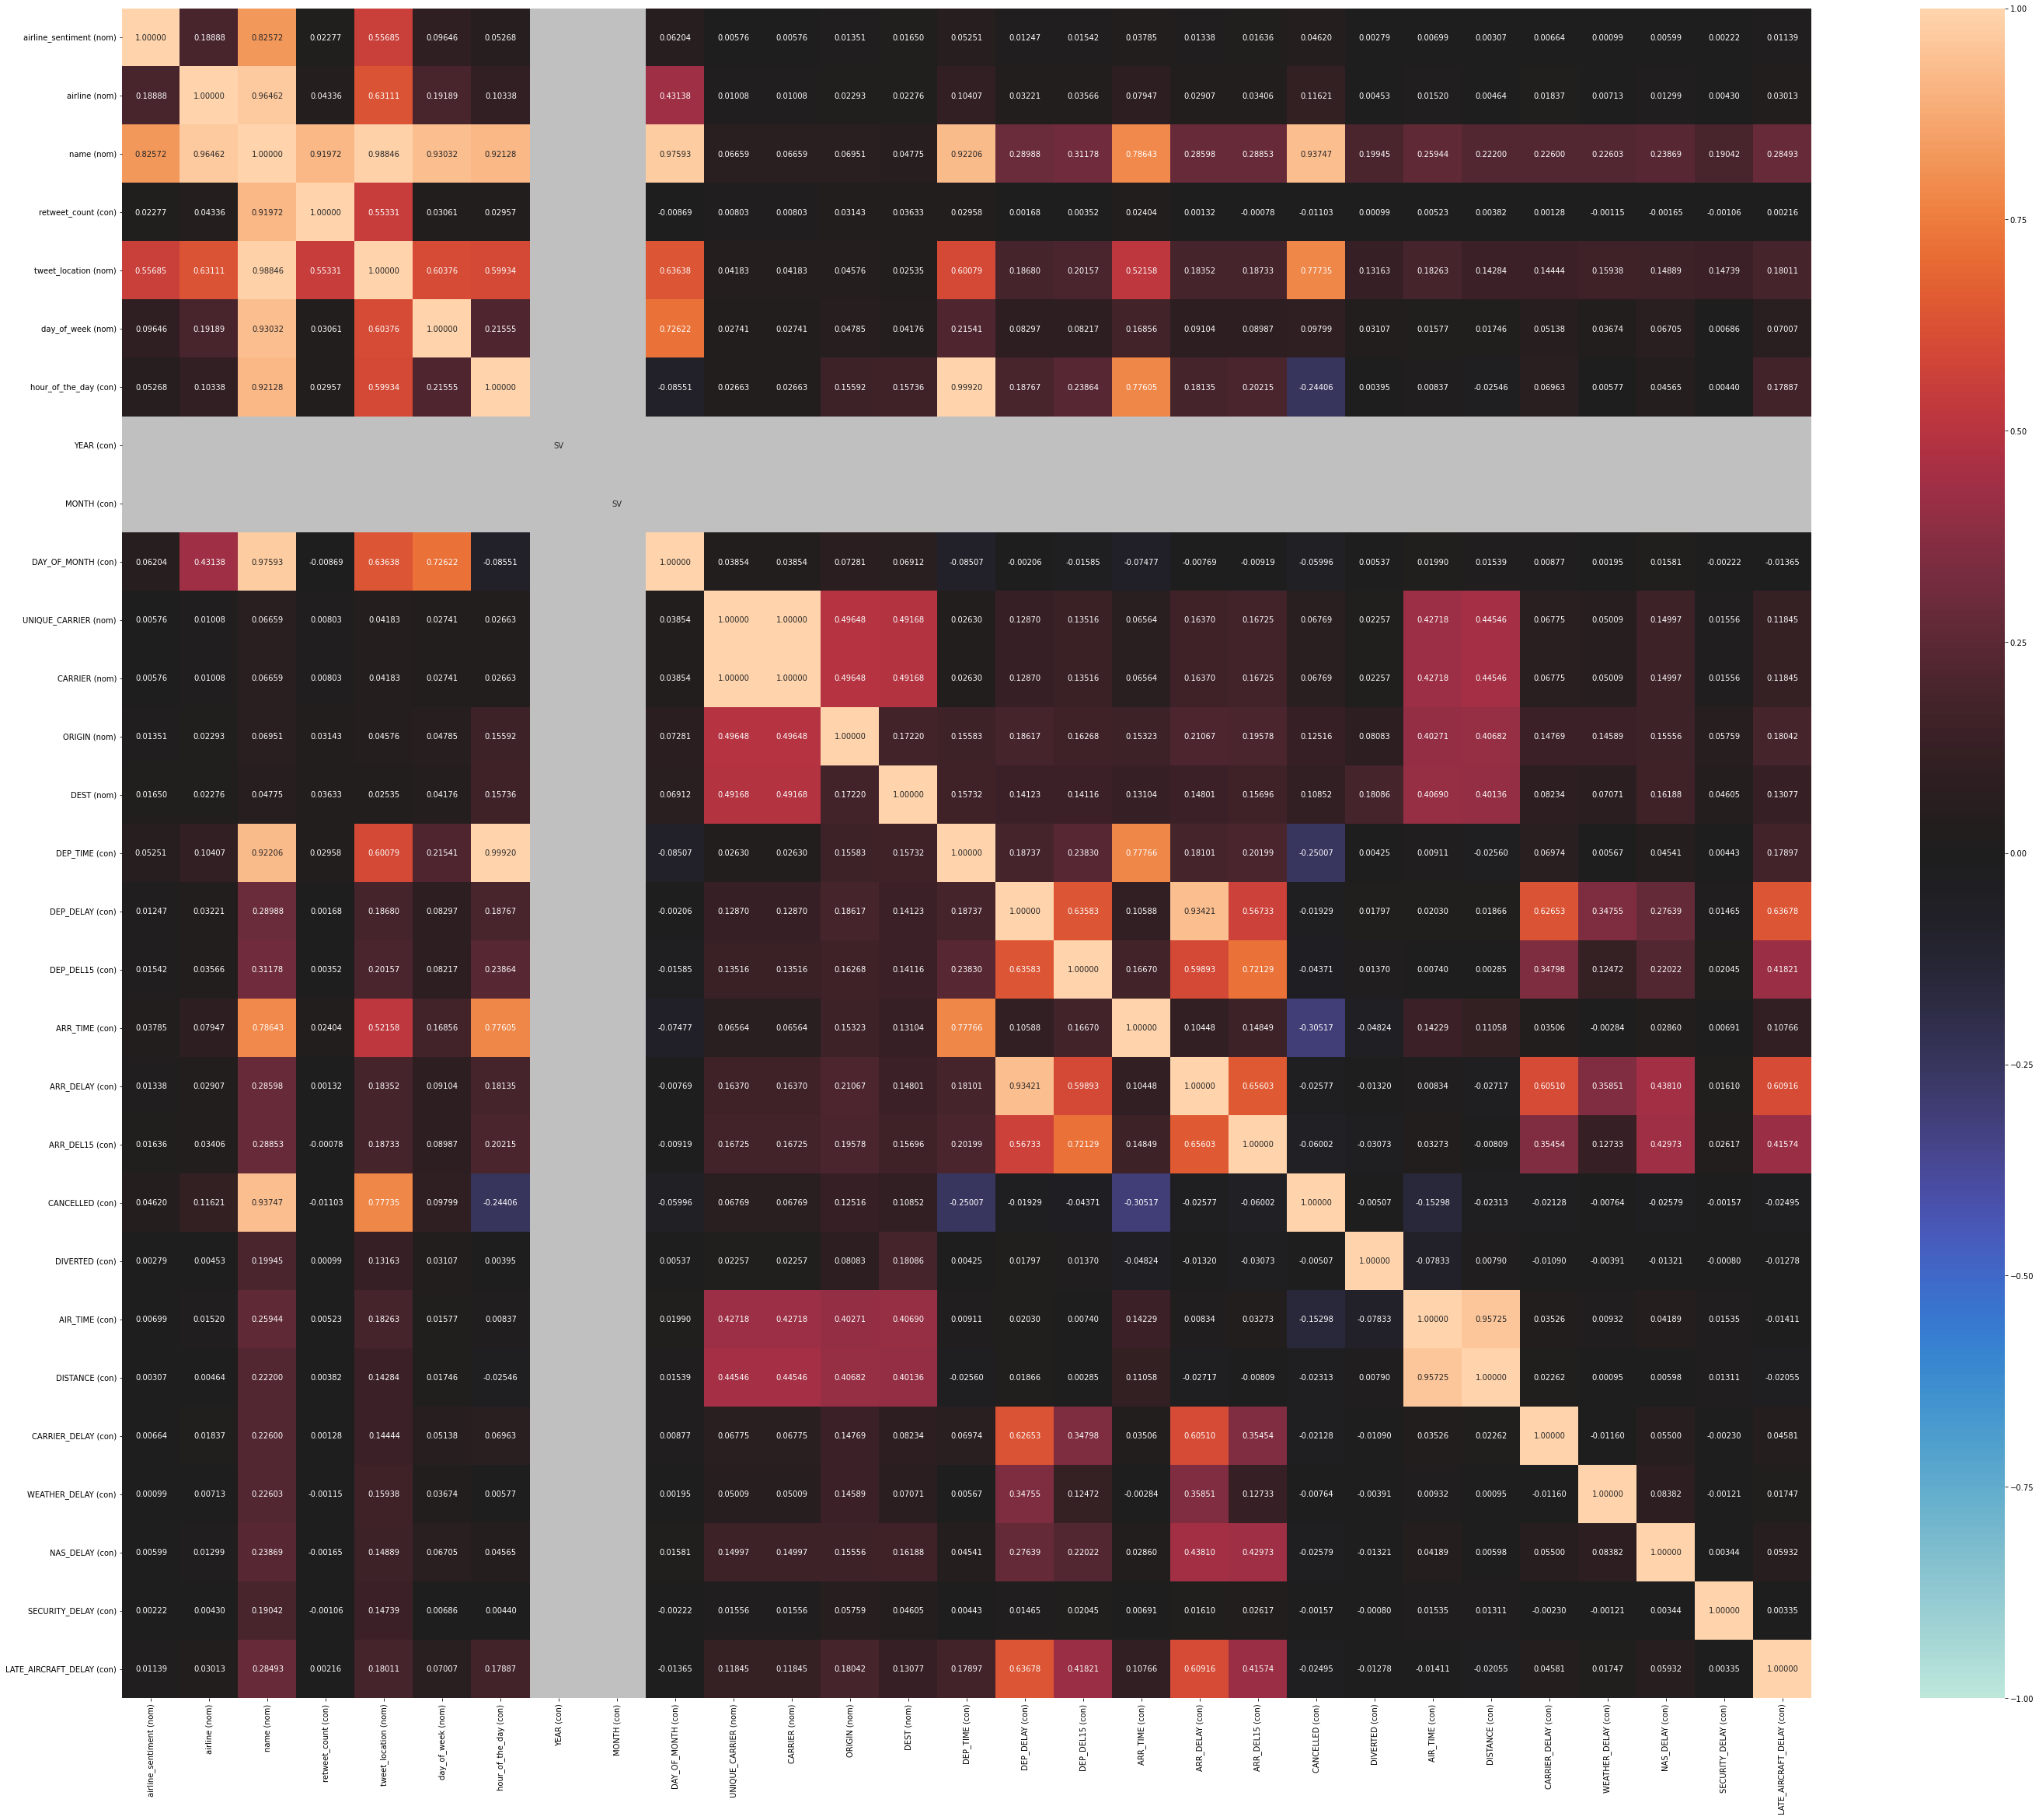

In [ ]:
#show the correlation heatmap between some continious and categorical values

!pip install dython
from dython import nominal
tweets_airlines_map_df=tweets_airlines_df[['airline_sentiment','airline_sentiment_num','airline','name','retweet_count','tweet_location','day_of_week','hour_of_the_day','YEAR','MONTH','DAY_OF_MONTH','UNIQUE_CARRIER','CARRIER','ORIGIN','DEST','DEP_TIME','DEP_DELAY','DEP_DEL15','ARR_TIME','ARR_DELAY','ARR_DEL15','CANCELLED','DIVERTED','AIR_TIME','DISTANCE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]

nominal.associations(tweets_airlines_map_df,figsize=(50,40),mark_columns=True);

In [33]:
#in order to find out correlation between tweets and cancelled flights
#frequency table is a way of finding distribution between two categorical variables. In this case between "airline_sentiment" and "CANCELLED"

cross_tab_result=pd.crosstab(tweets_airlines_df.airline_sentiment, tweets_airlines_df.CANCELLED)
cross_tab_result

CANCELLED,0.0,1.0
airline_sentiment,,
negative,119398,1005
neutral,41393,762
positive,32674,149


In [35]:
#in order to find out correlation between tweets and cancelled flights
#execute Chi-sq test over frequency table

# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(cross_tab_result)
 
# P-Value is the probability of H0 being true
# if P-Value>0.05 then only we accept the assumption of H0
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

#the p-value is smaller than 0.05 (2.716792428089885e-91), so we reject the null hypothesis that the relationship between
#"airline_sentiment" and "cancelled" is not significant.

The P-Value of the ChiSq Test is: 2.716792428089885e-91


In [36]:
#in order to find out correlation between tweets and cancelled flights using methods for numerical variables
#create in tweets_airlines_df the column "airline_sentiment_num" as numerical variable from "airline_sentiment"
#neutral  --> 0
#postive  --> 1
#negative --> 2

tweets_airlines_df['airline_sentiment_num'] = pd.factorize(tweets_airlines_df.airline_sentiment)[0]
tweets_airlines_sentiment_df=tweets_airlines_df[['airline_sentiment', 'airline_sentiment_num']]
tweets_airlines_sentiment_df.head(100)

,airline_sentiment,airline_sentiment_num
0,neutral,0
1,neutral,0
2,neutral,0
3,neutral,0
4,neutral,0
5,neutral,0
6,neutral,0
7,neutral,0
8,neutral,0
9,neutral,0


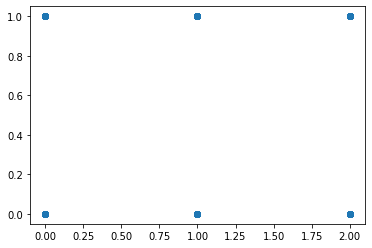

In [37]:
#in order to find out correlation between tweets and cancelled flights using methods for numerical variables
#scatter plot between 2 numerical variables "airline_sentiment_num" and "CANCELLED"

plt.scatter(tweets_airlines_df['airline_sentiment_num'], tweets_airlines_df['CANCELLED'])
plt.show()

#the below plot suggests the absence of a linear relationship between the two variables.

In [40]:
#confirm with the linear regression correlation test (numerical variables)
from scipy.stats import linregress
linregress(tweets_airlines_df['airline_sentiment_num'], tweets_airlines_df['CANCELLED'])

#the p-value is smaller than 0.05 (7.147340032950288e-49), so we reject the null hypothesis that the relationship between
#"airline_sentiment_num" and "cancelled" is not significant.

LinregressResult(slope=-0.003995850089852632, intercept=0.015402625967910318, rvalue=-0.03323167718931514, pvalue=7.147340032950288e-49, stderr=0.0002718804919662401)